In [ ]:
# Todos:
# - create an 500m grid all over vienna [x]
# - generate Vectors for all of them
# - make a comparison with tu Vienna polygon

In [2]:
from create_semantic_vector import Spatial_Semantic_Vector
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd

In [3]:
spatial_semantic_vector_obj = Spatial_Semantic_Vector('../data/spatial_semantics/kv_df_just_eng.pickle',
                                                      '../data/spatial_semantics/tag_sizes_median_df.pickle',
                                                      "../data/en_wikipedia_corpus/doc2vec_eng.pickel")
# tu wien Polygon (for testing purpose)
q_poly = Polygon([(16.36896371841431,48.20063653233946),
                  (16.373598575592045,48.19960677385028),
                  (16.371034383773807,48.19771882952509),
                  (16.36772990226746,48.19816221664037)])

In [4]:
level_1_admin = gpd.read_file("../data/shapes/level_1_admin/ne_10m_admin_1_states_provinces.shp")
# in this case we select vienna as the polyon
vienna_shape  = level_1_admin[level_1_admin['name']=='Wien']['geometry'].iloc[0]

In [5]:
min_lon, min_lat, max_lon, max_lat = vienna_shape.bounds

# 0.001° = 111 m
grid_size = 0.005


i_lon = min_lon
i_lat = min_lat
grid_list = []
while i_lon <= max_lon:
    while i_lat <= max_lat:
        poly = Polygon([(i_lon,i_lat),(i_lon,i_lat+grid_size),(i_lon+grid_size,i_lat+grid_size),(i_lon+grid_size,i_lat)])
        if vienna_shape.contains(poly):
            grid_list.append(poly)
        
        i_lat += grid_size
    i_lat = min_lat
    i_lon += grid_size
    

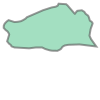

In [6]:
vienna_shape

<AxesSubplot:>

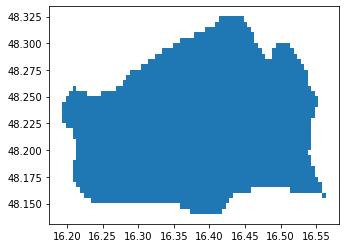

In [10]:
vienna_grid_gdf = gpd.GeoDataFrame({'geometry': grid_list}, crs="EPSG:4326")
vienna_grid_gdf.plot()

In [ ]:
vienna_grid_gdf['spatial_semantic_vector'] = vienna_grid_gdf['geometry'].apply(spatial_semantic_vector_obj.generate_vec)
vienna_grid_gdf.to_pickle('../data/spatial_semantics/vienna_grid_gdf.pickle')

In [36]:
# Initial setup of grid with vectors
vienna_grid_vec_gdf = vienna_grid_gdf.copy()
vienna_grid_vec_gdf['spatial_semantic_vector'] = None
vienna_grid_vec_gdf.to_pickle('../data/spatial_semantics/vienna_grid_vec_gdf.pickle')
vienna_grid_vec_gdf

,geometry,spatial_semantic_vector
0,"POLYGON ((16.19324 48.22525, 16.19324 48.23025...",None
1,"POLYGON ((16.19324 48.23025, 16.19324 48.23525...",None
2,"POLYGON ((16.19324 48.23525, 16.19324 48.24025...",None
3,"POLYGON ((16.19324 48.24025, 16.19324 48.24525...",None
4,"POLYGON ((16.19824 48.22025, 16.19824 48.22525...",None
...,...,...
1848,"POLYGON ((16.54824 48.24025, 16.54824 48.24525...",None
1849,"POLYGON ((16.54824 48.24525, 16.54824 48.25025...",None
1850,"POLYGON ((16.55324 48.16025, 16.55324 48.16525...",None
1851,"POLYGON ((16.55324 48.16525, 16.55324 48.17025...",None


In [44]:
vienna_grid_vec_gdf = pd.read_pickle('../data/spatial_semantics/vienna_grid_vec_gdf.pickle')
vienna_grid_vec_gdf = gpd.GeoDataFrame(vienna_grid_vec_gdf, geometry=vienna_grid_vec_gdf['geometry'])

for row in vienna_grid_vec_gdf[vienna_grid_vec_gdf['spatial_semantic_vector'].isnull()].iterrows():
    vienna_grid_vec_gdf.at[row[0],'spatial_semantic_vector'] = \
            spatial_semantic_vector_obj.generate_vec(row[1]['geometry'])
    vienna_grid_vec_gdf.to_pickle('../data/spatial_semantics/vienna_grid_vec_gdf.pickle')
    remaining = len(vienna_grid_vec_gdf[vienna_grid_vec_gdf['spatial_semantic_vector'].isnull()])
    print(f"{remaining} cells are remaining")
        

vienna_grid_vec_gdf

,geometry,spatial_semantic_vector
0,"POLYGON ((16.19324 48.22525, 16.19324 48.23025...","[0.43597317, -0.11197636, 0.45231423, -0.60275..."
1,"POLYGON ((16.19324 48.23025, 16.19324 48.23525...","[0.28504023, -0.20418024, 0.19543527, -0.58301..."
2,"POLYGON ((16.19324 48.23525, 16.19324 48.24025...",None
3,"POLYGON ((16.19324 48.24025, 16.19324 48.24525...",None
4,"POLYGON ((16.19824 48.22025, 16.19824 48.22525...",None
...,...,...
1848,"POLYGON ((16.54824 48.24025, 16.54824 48.24525...",None
1849,"POLYGON ((16.54824 48.24525, 16.54824 48.25025...",None
1850,"POLYGON ((16.55324 48.16025, 16.55324 48.16525...",None
1851,"POLYGON ((16.55324 48.16525, 16.55324 48.17025...",None


In [32]:
#vienna_grid_vec_gdf.loc[1,'spatial_semantic_vector'] = 'a'
vienna_grid_vec_gdf[vienna_grid_vec_gdf['spatial_semantic_vector'].isnull()]

,geometry,spatial_semantic_vector
1,"POLYGON ((16.19324 48.23025, 16.19324 48.23525...",None
2,"POLYGON ((16.19324 48.23525, 16.19324 48.24025...",None
3,"POLYGON ((16.19324 48.24025, 16.19324 48.24525...",None
4,"POLYGON ((16.19824 48.22025, 16.19824 48.22525...",None
5,"POLYGON ((16.19824 48.22525, 16.19824 48.23025...",None
...,...,...
1847,"POLYGON ((16.54824 48.17025, 16.54824 48.17525...",None
1848,"POLYGON ((16.54824 48.24025, 16.54824 48.24525...",None
1849,"POLYGON ((16.54824 48.24525, 16.54824 48.25025...",None
1851,"POLYGON ((16.55324 48.16525, 16.55324 48.17025...",None


In [8]:
small_vienna_grid_gdf = vienna_grid_gdf.loc[:10].copy()
small_vienna_grid_gdf

,geometry
0,"POLYGON ((16.19324 48.22525, 16.19324 48.23025..."
1,"POLYGON ((16.19324 48.23025, 16.19324 48.23525..."
2,"POLYGON ((16.19324 48.23525, 16.19324 48.24025..."
3,"POLYGON ((16.19324 48.24025, 16.19324 48.24525..."
4,"POLYGON ((16.19824 48.22025, 16.19824 48.22525..."
5,"POLYGON ((16.19824 48.22525, 16.19824 48.23025..."
6,"POLYGON ((16.19824 48.23025, 16.19824 48.23525..."
7,"POLYGON ((16.19824 48.23525, 16.19824 48.24025..."
8,"POLYGON ((16.19824 48.24025, 16.19824 48.24525..."
9,"POLYGON ((16.19824 48.24525, 16.19824 48.25025..."


In [9]:
small_vienna_grid_gdf['spatial_semantic_vector'] = small_vienna_grid_gdf['geometry'].apply(spatial_semantic_vector_obj.generate_vec)
small_vienna_grid_gdf.to_pickle('../data/spatial_semantics/small_vienna_grid_gdf.pickle')

next open slot in 83 seconds waiting till then
next open slot in 35 seconds waiting till then
next open slot in 30 seconds waiting till then
next open slot in 47 seconds waiting till then
next open slot in 34 seconds waiting till then
next open slot in 30 seconds waiting till then
next open slot in 21 seconds waiting till then
